# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

# Part 2: (65 pts)

## Question 1: Multi-Class Classification and Evaluation Metrics (20 points)

In this question, you are tasked with training a multi-class classification model using the [Digits dataset](https://scikit-learn.org/stable/datasets/index.html#digits-dataset), a dataset included in scikit-learn. This dataset contains 1797 8x8 images, meaning that each image is an 8x8 matrix of pixels, and each pixel is an integer value between 0 and 16. Each image is labeled with the digit it represents, from 0 to 9.
### Tasks

1. **Load the Data (5 pts):**
   Load the Digits dataset from scikit-learn's included datasets. Split the data into a training set (70%) and a test set (30%).
   
3. **Train a Model (5 pts):**
   Train a multi-class Logistic Regression on the training data. 

4. **Evaluate the Model (5 pts):**
   Predict the classes of the test set and calculate the F1 score for each class (in the f1 function, use `average=None`). Provide the F1 score for each class in the test set.

5. **Class Report (5 pts):**
   Generate a classification report to evaluate the performance of your model. The report should include precision, recall, and F1 score for each class.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

# Loading the dataset
# YOUR CODE HERE
digits = datasets.load_digits() #Load the digits dataset
digitsData = digits["data"] #Get the data from the dataset
digitsTarget = digits["target"] #Get the target from the dataset

X_train, X_test, y_train, y_test = train_test_split(digitsData, digitsTarget, test_size = 0.3) #Split the data 70 30

In [3]:
# 5 points. Load data into X and y matrices
def test_data_split():
    assert X_train.shape == (1257, 64), f"Expected (1257, 64), but got {X_train.shape}"
    assert X_test.shape == (540, 64), f"Expected (540, 64), but got {X_test.shape}"
    assert y_train.shape == (1257,), f"Expected (1257,), but got {y_train.shape}"
    assert y_test.shape == (540,), f"Expected (540,), but got {y_test.shape}"

test_data_split()

In [4]:
# Training a logistic regression model
# YOUR CODE HERE
clf = LogisticRegression() #Initialize the logistic regression
clf.fit(X_train, y_train) #Fit the regression on the training data

C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
# 5 pts
def test_model_training():
    assert clf.coef_.shape == (10, 64), f"Expected coefficient shape (10, 64), but got {clf.coef_.shape}"
    assert clf.intercept_.shape == (10,), f"Expected intercept shape (10,), but got {clf.intercept_.shape}"
    assert set(clf.classes_) == set(range(10)), f"Expected classes {set(range(10))}, but got {set(clf.classes_)}"

test_model_training()

In [6]:
# Predicting the classes of the test set
# YOUR CODE HERE
y_pred = clf.predict(X_test) #Predict based on the testing data
f1_scores = f1_score(y_test, y_pred, average = None) #Get the f1 scores based off of the predictions

In [7]:
# 5 pts
def test_model_evaluation():
    assert y_pred.shape == (540,), f"Expected (540,), but got {y_pred.shape}"
    assert len(f1_scores) == 10, f"Expected 10 F1 scores, but got {len(f1_scores)}"
    for score in f1_scores:
        assert score >= 0 and score <= 1, f"F1 score {score} is out of range"

test_model_evaluation()

In [8]:
# Generating a classification report
# YOUR CODE HERE
class_report = classification_report(y_test, y_pred) #Create a classification report based off of the predictions
print(f"F1 Scores for each class: {f1_scores}")
print("\nClassification Report:")
print(class_report)

F1 Scores for each class: [0.98214286 0.93333333 0.95348837 0.97520661 0.97029703 0.95652174
 0.97560976 1.         0.92156863 0.95575221]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.91      0.96      0.93        51
           2       0.95      0.95      0.95        43
           3       0.97      0.98      0.98        60
           4       0.98      0.96      0.97        51
           5       0.95      0.96      0.96        57
           6       0.98      0.97      0.98        62
           7       1.00      1.00      1.00        51
           8       0.94      0.90      0.92        52
           9       0.98      0.93      0.96        58

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [9]:
# 5 pts
def test_class_report():
    lines = class_report.strip().split("\n")
    assert len(lines) == 16, f"Expected 16 lines in classification report, but got {len(lines)}"
    assert "precision" in lines[0] and "recall" in lines[0] and "f1-score" in lines[0], "Header of classification report is missing or incorrect"
    assert 'accuracy' in lines[-3], "Accuracy line in classification report is missing or incorrect"
    
test_class_report()

## Question 2: ROC and AUC for Multi-Class Classification (20 points)

### Problem Statement

Continuing from Question 1, you will now evaluate your trained multi-class classification model in more detail. In this question, you are required to compute and plot the ROC curves for each class and calculate the Area Under the Curve (AUC) values using the `load_digits` dataset.

### Tasks

1. **Compute ROC and AUC (10 pts):**
   Compute the ROC curves and AUC values for each class in the test set. You might need to binarize the labels for this task. Look up the use of `label_binarize` for the task

2. **Plot ROC Curves (5 pts):**
   Plot the ROC curves for all classes on a single graph. Make sure each class is represented by a curve of a different color, and include a legend indicating which class each curve corresponds to.

3. **Analysis (5 pts):**
   Analyze and interpret the AUC values and ROC curves of each class. What does it tell you about your model's performance for different classes?

In [10]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# YOUR CODE HERE
unique = [] #Initialize a unique items list, since numpy was not an import allowed to use so I cannot use np.unique

#For each item in the y_test, see if we already have it in the unique list
for item in y_test:
    
    #If the item is unique (ie not in the unique list), add it to the unique list
    if item not in unique:
        unique.append(item) #Add the item to the unique list
unique.sort() #Sort the unique list so that it is the list of classes
n_classes = len(unique) #Get the number of classes

binary = label_binarize(y_test, classes = unique) #Binarize the data
predBinary = label_binarize(y_pred, classes = unique) #Binarize the predicted data

#Pulling the for loop idea from https://www.geeksforgeeks.org/multiclass-receiver-operating-characteristic-roc-in-scikit-learn/
#Mostly because I did not realize the roc_curve just didn't like that I was trying to pass in multiclass data

fpr = [] #Holder for the false positive rates
tpr = [] #Holder for the true positive rates

#For each class, get the true and false positive rates and add them to the holder lists
for i in range(0, n_classes):
    fpri, tpri, _ = roc_curve(binary[:,i], predBinary[:,i]) #Run the roc curve on one class
    fpr.append(fpri) #Add this false positive rate to the false positive rate holder list
    tpr.append(tpri) #Add this true positive rate to the true positive rate holder list

roc_auc = roc_auc_score(binary, predBinary, average = None) #Get the aucs from the ROC AUC score metric
print(roc_auc) #Print the aucs so I can see them for analysis

[0.99793814 0.97527968 0.97473211 0.98958333 0.97936966 0.97935055
 0.98282494 1.         0.94884931 0.9644799 ]


In [11]:
## 10 pts
def test_roc_and_auc():
    assert len(fpr) == n_classes, f"Expected {n_classes} fpr arrays, but got {len(fpr)}"
    assert len(tpr) == n_classes, f"Expected {n_classes} tpr arrays, but got {len(tpr)}"
    assert len(roc_auc) == n_classes, f"Expected {n_classes} AUC values, but got {len(roc_auc)}"
    for i in range(n_classes):
        assert fpr[i].shape == tpr[i].shape, f"Shape mismatch between fpr and tpr for class {i}"
        assert 0 <= roc_auc[i] <= 1, f"AUC for class {i} is out of range"

test_roc_and_auc()

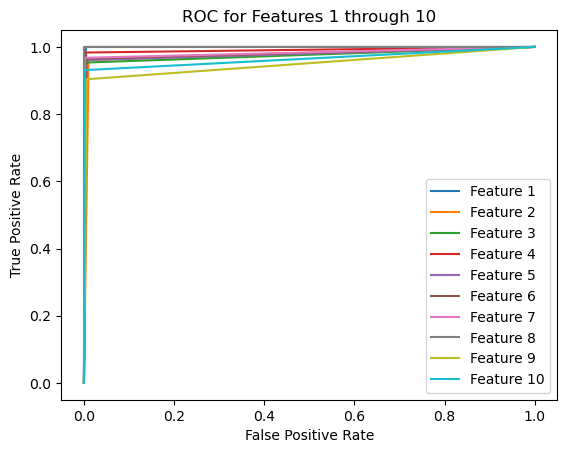

In [12]:
# 5 pts
# Plotting the ROC curves
# Print AUC values for each class

# YOUR CODE HERE
#For each feature, plot the false and true positive rates as defined by the roc above
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label = f"Feature {i+1}") #Plot the roc for feature i, changed to 1-10 for human brain reasons

plt.title("ROC for Features 1 through 10") #Show a title
plt.ylabel("True Positive Rate") #Add a label showing the true positive rate
plt.xlabel("False Positive Rate") #Add a label showing the false positive rate
plt.legend() #Show a legend of all of the features
plt.show() #Show the overall plot for all of the features

***Analysis (5 pts)***
Analyze and interpret the AUC values and ROC curves of each class. What does it tell you about your model's performance for different classes?

Class 1: This one is a full right angle with an AUC of 1, showing perfect results. No errors.

Class 2, 4, 5, 7, 8, 9, and 10: All of these exist as a clump of the ROC with very close AUC values, showing low false positives and a generally good ability to show off the classes.

Class 3: This one stands out from the other classes by not having its heel against the wall, so to speak. While this is very slight in this case, it shows that it has more false positives than the others. The rest are all lined up against the back wall, showing very few false positives.

Class 6: This one is notable for being lower against the left side than the rest, showing a lower ability to predict this class right. This difference is very small, as the AUC still shows a 0.94, but it is notable when comparing against the other class. None of them are bad in that area per se, but this one is just a little worse than the rest at the true positives.

## Question 3: Regularization Path of L2 Regularization (20 points)

### Problem Statement

In this question, you are required to analyze the effect of L2 regularization on the logistic regression model that you trained in Question 1. Specifically, you will examine how the weights associated with the features change as the strength of regularization is varied. This is often referred to as the regularization path. 

The regularization path shows the coefficients of the features for many values of the regularization parameter. In the context of L2 regularization, it helps to visualize how increasing the regularization strength pushes the coefficients towards zero, offering insight into the model's complexity and potential overfitting or underfitting issues.

### Tasks

1. **Compute Regularization Path (10 pts):**
   Train logistic regression models to predict whether the digit is '3' or not, with varying values of the L2 regularization parameter (e.g., `C` in scikit-learn’s implementation, where `C` is the inverse of regularization strength, smaller values specify stronger regularization). Collect the coefficients of the features for each value of the regularization parameter. Create a variable `regularization_strengths` that in log space goes from -4 to 4 in 12 steps.

2. **Plot Regularization Path (5 pts):**
   Plot the regularization path, showing how the coefficients change with different regularization strengths. Label the axes appropriately and provide a legend to distinguish different features if necessary.

The plot should look something like this:
![](./regularization_path.png)

3. **Analysis (5 pts):**
   Analyze the plot. How do the coefficients change as the regularization strength increases? What does this tell you about the influence of L2 regularization on the model parameters?
   
I mean, I assume this question is meant to be corresponding to the one on the bottom since they are supposed to be the same plot, but I can answer it here too just to be thorough. The coefficients get more wild as regularization strength increases, as the model goes bases its strictness on the inverse of the strength. That is to say, it is more strict with a smaller rate and vice versa. Thus, it increases the perceived importance of each variable more as strength gets bigger.

In [13]:
import numpy as np
step_size = 8/11 #Create a variable for how different each step should be 
steps = 12 #Define the number of steps
regularization_strengths = [] #Create a list for the regularization strengths
log_labels = [] #Create a label list for the plot
coefficients = [] #Create a coefficients list to hold the coefficients

#For label values -5 to 6 (because the plot labels did not want to work without that buffer), add the label to the label list
for i in range(-5, 6):
    log_labels.append(f"10^{i}") #Append the label to the label list

#For each step i, append the appropriate strength to the regularization strength, adding one step size to -4 for its current location
for i in range(0,steps):
    regularization_strengths.append(10**(-4 + (step_size*i))) #Add the strength to the strength list
    
digitsTarget3 = [] #Create a targets list just for 3

#For each digit in the target digit set, change it to 1 if it is a 3 or change it to 0 otherwise, because we are only looking for 3
for digit in digits["target"]:
    #If the digit is 3, append 1 to the list checking for 3's
    if digit == 3:
        digitsTarget3.append(1) #Add the 3 to the 3 list
    
    #If this digit is not 3, append a 0 to represent not 3
    else:
        digitsTarget3.append(0) #Add the not 3 to the 3 list

X_train3, X_test3, y_train3, y_test3 = train_test_split(digitsData, digitsTarget3, test_size = 0.3) #Split the new 3's data 70 30    

#For each strength, fit a logistic regression and get its coefficients
for stren in regularization_strengths:
    clf = LogisticRegression(C = stren) #Create the model
    clf.fit(X_train3, y_train3) #Fit the model
    coefficients.append(np.array(clf.coef_)) #Steal its coefficients

coefficients = np.array(coefficients) #Turn the coefficients list into a numpy array
coefficients = coefficients.reshape(12, 64) #Reshape the array to fit into a 12, numCoefficients scheme
coefficients = np.transpose(coefficients) #Transpose the array because that is what the tests expect
print(coefficients.shape) #Print the shape to show that it fits

C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

(64, 12)


C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [14]:
# 10 pts
def test_regularization_path():
    assert coefficients.shape[1] == len(regularization_strengths), "Mismatch in the number of coefficient sets and regularization strengths"
    for coef in coefficients:
        assert coef.shape == (12,), f"Expected coefficient shape (12,), but got {coef.shape}"

test_regularization_path()

Plotting sources: Ticks: https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks Legend outside box: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

I tried to get the plot as close as I could to the image given. I could not quite get the x labels to work as well and the legend extends very far down. I guess it is fine that the legend extends down because the original image is cropped and I cannot guarentee that the image is not just as long.

C:\Users\lunam\AppData\Local\Temp\ipykernel_10920\3830658384.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(log_labels) #Set the log labels to the x labels


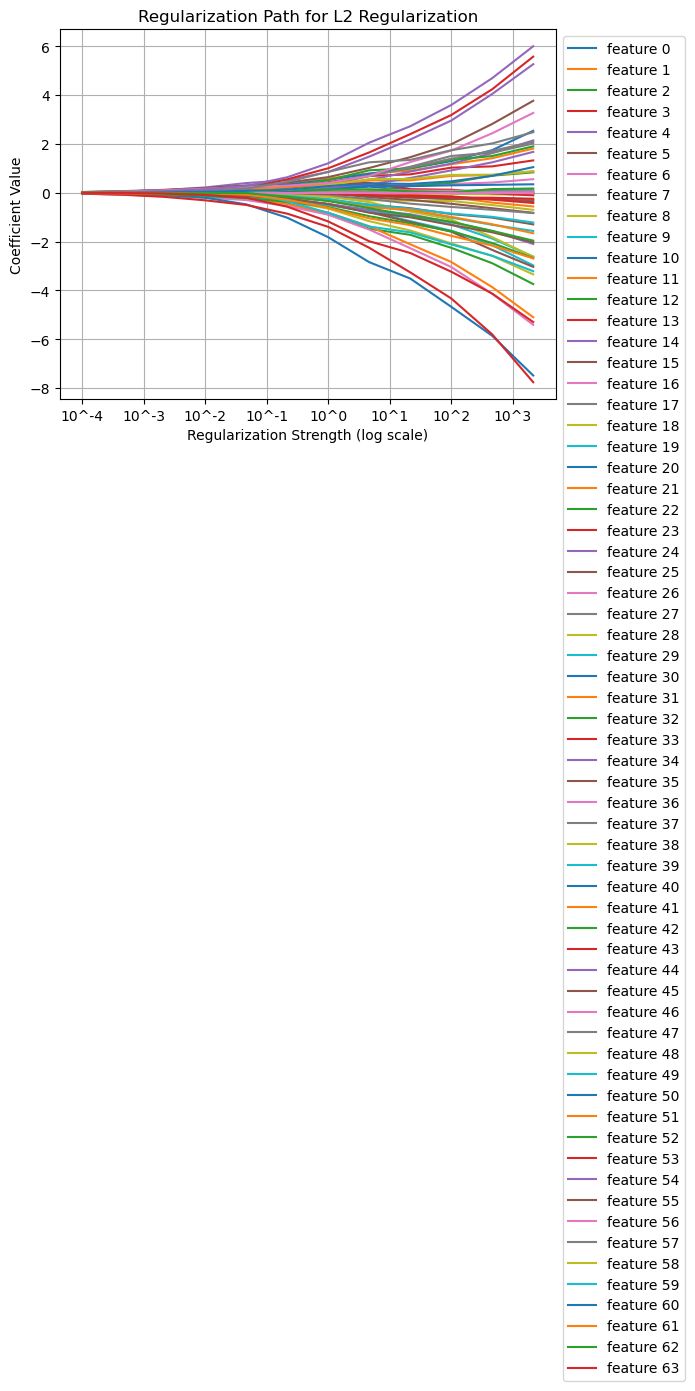

In [15]:
# 5 pts
# YOUR CODE HERE
fig, ax = plt.subplots(1,1) #Create a subplot so I can use the axes set xticks

#For each coefficient, plot it and add a feature label to it
for i in range(0, len(coefficients)):
    plt.plot(coefficients[i], label = f"feature {i}") #Plot the coefficient and add a feature label to it
 
ax.xaxis.set_major_locator(plt.MaxNLocator(9)) #Set the ticks so that it fits the log labels rather than the strange number strengths
ax.set_xticklabels(log_labels) #Set the log labels to the x labels

plt.xlabel("Regularization Strength (log scale)") #Add the title to the plot
plt.ylabel("Coefficient Value") #Add the y label to the plot
plt.title("Regularization Path for L2 Regularization") #Add the x label to the plot

plt.legend(bbox_to_anchor=(1, 1)) #Add the legend, anchoring it outside of the plot to fit with the image
plt.grid() #Add a grid to the plot
plt.show() #Show the plot

**Analysis (5 pts):**
Analyze the plot. How do the coefficients change as the regularization strength increases? What does this tell you about the influence of L2 regularization on the model parameters?

The coefficients get more wild as regularization strength increases, as the model goes bases its strictness on the inverse of the strength. That is to say, it is more strict with a smaller rate and vice versa. Thus, it increases the perceived importance of each variable more as strength gets bigger.